#Importing libraries and cleaned_df_Eg dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
warnings.filterwarnings("ignore")
df=pd.read_csv('cleaned_df_Eg.csv')
pd.set_option('display.max_columns', None)
df.head(2)

,perovskite,E_g,Cs,FA,MA,Pb,Sn,I,Br
0,Cs0.01FA0.39MA0.6PbBr0.025I2.975,1.6,0.01,0.39,0.60,1.0,0.0,2.975,0.025
1,Cs0.01MA0.99PbBr0.03I2.97,1.6,0.01,0.00,0.99,1.0,0.0,2.970,0.030


#Data Prep

In [3]:
dfx=df.iloc[:,2:]
X=dfx.values
y=df.iloc[:,1].values
y=y.reshape(len(y),1)
dfx

,Cs,FA,MA,Pb,Sn,I,Br
0,0.010,0.390,0.60,1.0,0.0,2.975,0.025
1,0.010,0.000,0.99,1.0,0.0,2.970,0.030
2,0.025,0.475,0.50,0.5,0.5,3.000,0.000
3,0.025,0.825,0.15,1.0,0.0,2.550,0.450
4,0.020,0.380,0.60,1.0,0.0,2.975,0.025
...,...,...,...,...,...,...,...
546,0.000,0.000,1.00,0.0,1.0,0.360,2.640
547,0.000,0.000,1.00,0.0,1.0,1.000,2.000
548,0.000,0.000,1.00,0.0,1.0,0.000,3.000
549,0.000,0.000,1.00,0.0,1.0,2.000,1.000


#Best Model

In [4]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.8 MB/s eta 0:00:00


In [5]:
from catboost import CatBoostRegressor
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.15, random_state=100)
# Train model with the best hyperparameters
best_cb = CatBoostRegressor(
    iterations=447,
    depth=7,
    learning_rate=0.01160773886463643,
    l2_leaf_reg=0.17646457712200744,
    bagging_temperature=0.796219937369702,
    random_strength=3.372120712870285,
    border_count=110,
    od_type='IncToDec',
    od_wait=20,
    random_seed=100
)
best_cb.fit(X_train4, y_train4, verbose=0)

mse_scores = cross_val_score(estimator = best_cb, X = X_train4, y = y_train4, cv = 5, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-mse_scores)
print("RMSE: {:.4f}".format(rmse_scores.mean()))
print("Standard Deviation: {:.4f}".format(rmse_scores.std()))

0:	learn: 0.2251333	total: 1.1ms	remaining: 489ms
1:	learn: 0.2232228	total: 7.05ms	remaining: 1.57s
2:	learn: 0.2211582	total: 8.64ms	remaining: 1.28s
3:	learn: 0.2193139	total: 11.4ms	remaining: 1.26s
4:	learn: 0.2171937	total: 14.1ms	remaining: 1.24s
5:	learn: 0.2151266	total: 16.6ms	remaining: 1.22s
6:	learn: 0.2131430	total: 19.4ms	remaining: 1.22s
7:	learn: 0.2113452	total: 22ms	remaining: 1.21s
8:	learn: 0.2094871	total: 24.5ms	remaining: 1.19s
9:	learn: 0.2078168	total: 26.5ms	remaining: 1.16s
10:	learn: 0.2061303	total: 28.7ms	remaining: 1.14s
11:	learn: 0.2043308	total: 31.2ms	remaining: 1.13s
12:	learn: 0.2024734	total: 33.7ms	remaining: 1.12s
13:	learn: 0.2007173	total: 36.5ms	remaining: 1.13s
14:	learn: 0.1990433	total: 39.1ms	remaining: 1.13s
15:	learn: 0.1973150	total: 42.4ms	remaining: 1.14s
16:	learn: 0.1958169	total: 43.6ms	remaining: 1.1s
17:	learn: 0.1940180	total: 45.5ms	remaining: 1.08s
18:	learn: 0.1922852	total: 48.3ms	remaining: 1.09s
19:	learn: 0.1905642	total

In [6]:
y_pred_n4 = best_cb.predict(X_test4)
y_pred_n4 = y_pred_n4.reshape(len(y_pred_n4), 1)
r_value4 = np.corrcoef(y_test4.squeeze(), y_pred_n4.squeeze())[0, 1]

# Calculate metrics on the test set
print("R2 on Test Set:", r2_score(y_test4, y_pred_n4))
print("R value:", r_value4)
print("MAE on Test Set:", mean_absolute_error(y_test4, y_pred_n4))
print("MSE on Test Set:", mean_squared_error(y_test4, y_pred_n4))
print("RMSE on Test Set:", np.sqrt(mean_squared_error(y_test4, y_pred_n4)))

R2 on Test Set: 0.9240769603021914
R value: 0.9634866900579305
MAE on Test Set: 0.040636359607477295
MSE on Test Set: 0.0029568971170600036
RMSE on Test Set: 0.054377358496528715


#Prediction with Experimental result

In [7]:
# Create a DataFrame for input
my_dict = {
    'Cs': [0, 0.05, 0.05, 0.05, 0.15, 0.15, 0.15, 0.15, 1, 1, 1, 1, 1,],
    'FA': [0.18, 0.5225, 0.855, 0.7, 0, 0, 0.7, 0.7, 0, 0, 0, 0, 0],
    'MA': [0.82, 0.4275, 0.095, 0.25, 0.85, 0.85, 0.15, 0.15, 0, 0, 0, 0, 0],
    'Pb': [0, 1, 1, 0.5, 1, 1, 1, 1, 1, 0.55, 0.25, 0.4, 0.4],
    'Sn': [1, 0, 0, 0.5, 0, 0, 0, 0, 0, 0.45, 0.75, 0.6, 0.6],
    'I': [0, 1.65, 2.85, 3, 2.25, 1.95, 0.45, 2.55, 1.5, 2, 1, 2.4, 2],
    'Br': [3, 1.35, 0.15, 0, 0.75, 1.05, 2.55, 0.45, 1.5, 1, 2, 0.6, 1],
    'Actual Bandgap': [1.92, 1.83, 1.56, 1.22,  1.71, 1.78, 2.05, 1.62, 1.97, 1.50, 1.64, 1.35, 1.42]  # Actual bandgap values
}

# Create the DataFrame from the dictionary
df_input = pd.DataFrame(my_dict)

# Predict the bandgap using the trained model (best_cb) using only composition details as input
composition_columns = ['Cs', 'FA', 'MA', 'Pb', 'Sn', 'I', 'Br']
df_input['Predicted Bandgap'] = best_cb.predict(df_input[composition_columns])
df_input['Predicted Bandgap'] = df_input['Predicted Bandgap'].round(2)

# Display the DataFrame with inputs, predictions, and actual bandgap values
df_input


,Cs,FA,MA,Pb,Sn,I,Br,Actual Bandgap,Predicted Bandgap
0,0.00,0.1800,0.8200,0.00,1.00,0.00,3.00,1.92,1.92
1,0.05,0.5225,0.4275,1.00,0.00,1.65,1.35,1.83,1.80
2,0.05,0.8550,0.0950,1.00,0.00,2.85,0.15,1.56,1.56
3,0.05,0.7000,0.2500,0.50,0.50,3.00,0.00,1.22,1.25
4,0.15,0.0000,0.8500,1.00,0.00,2.25,0.75,1.71,1.72
5,0.15,0.0000,0.8500,1.00,0.00,1.95,1.05,1.78,1.78
6,0.15,0.7000,0.1500,1.00,0.00,0.45,2.55,2.05,2.16
7,0.15,0.7000,0.1500,1.00,0.00,2.55,0.45,1.62,1.62
8,1.00,0.0000,0.0000,1.00,0.00,1.50,1.50,1.97,1.94
9,1.00,0.0000,0.0000,0.55,0.45,2.00,1.00,1.50,1.46


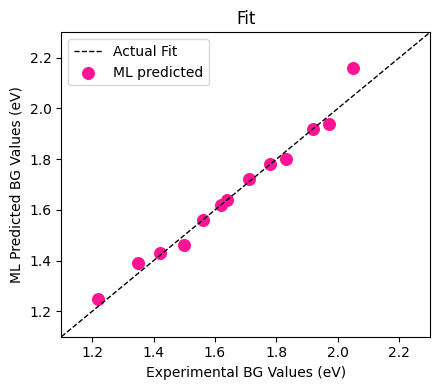

In [8]:
plt.figure(figsize=(4.5, 4))
x_min, x_max = 1.1, 2.3
plt.plot([x_min, x_max], [x_min, x_max], color='black', linestyle='--', linewidth=1, label='Actual Fit')
plt.scatter(df_input['Actual Bandgap'], df_input['Predicted Bandgap'], color='deeppink', s=70, label='ML predicted')

plt.title('Training Set: Actual vs Predicted')
plt.xlabel('Experimental BG Values (eV)')
plt.ylabel('ML Predicted BG Values (eV)')
plt.legend()
#plt.grid(True)
plt.title('Fit')
plt.savefig('Fit.png')

# Set xlim and ylim
plt.xlim(1.1, 2.3)  # Adjust these values as needed
plt.ylim(1.1, 2.3)  # Adjust these values as needed

plt.tight_layout()
plt.show()

#Bandgap generation for CBM and VBM

In [ ]:
dfb=pd.read_csv('cbm_vbm.csv')
dfb.head()

,Cs,FA,MA,Pb,Sn,I,Br,E_g,CBM,VBM
0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,1.55,-3.90,-5.45
1,1.0,0.0,0.0,1.0,0.0,3.0,0.0,1.80,-3.60,-5.40
2,1.0,0.0,0.0,1.0,0.0,2.0,1.0,1.91,-3.69,-5.60
3,1.0,0.0,0.0,1.0,0.0,0.0,3.0,2.30,-3.30,-5.60
4,0.0,0.5,0.5,0.5,0.5,3.0,0.0,1.25,-4.15,-5.40


In [ ]:
index_of_column = dfb.columns.get_loc('Br')
print(f"The index of 'column_name' is: {index_of_column}")

The index of 'column_name' is: 6


In [ ]:
dfb1=dfb.iloc[:,:7]
#df3 = pd.concat([df2.iloc[:,0],df2.iloc[:,2:4],df3,df2.iloc[:,1],df2.iloc[:,4:6],df2.iloc[:,11:]], axis=1)
dfb1

,Cs,FA,MA,Pb,Sn,I,Br
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0
...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0


In [ ]:
inp=dfb1.values
Eg_predicted = best_cb.predict(inp)
Eg_predicted = Eg_predicted.reshape(len(Eg_predicted), 1)
Eg_predicted

array([[1.56434364],
       [1.70882795],
       [1.87744515],
       [2.32759129],
       [1.25513341],
       [1.56434364],
       [1.73631308],
       [1.87744515],
       [2.05660187],
       [1.39002297],
       [1.31783629],
       [1.36293423],
       [1.42832612],
       [1.47798203],
       [1.66841047],
       [1.99136286],
       [1.30735392],
       [1.45310049],
       [1.38292292],
       [1.56434364],
       [1.32700732],
       [1.3042857 ],
       [1.29809024],
       [1.3256372 ],
       [1.27514709],
       [1.32868926],
       [1.57489668],
       [1.61599306],
       [1.83371727],
       [2.32759129],
       [1.70882795],
       [1.56434364],
       [1.28736485],
       [1.24047421],
       [1.22643879],
       [1.2592525 ],
       [1.27514709],
       [1.5344271 ],
       [1.52997815],
       [1.53488599],
       [1.54816546],
       [1.53511478],
       [1.5929654 ],
       [1.6310373 ],
       [1.54299822],
       [1.5886433 ],
       [1.56172103],
       [1.570

In [ ]:
dfb2 = pd.DataFrame(Eg_predicted, columns=['ML_Eg'])
dfb2['ML_Eg'] = dfb2['ML_Eg'].round(3)
dfb2

,ML_Eg
0,1.564
1,1.709
2,1.877
3,2.328
4,1.255
...,...
105,1.285
106,1.307
107,1.877
108,1.419


In [ ]:
cbm_vbm_new = pd.concat([dfb.iloc[:,0:7],dfb2,dfb.iloc[:,7:]], axis=1)
cbm_vbm_new

,Cs,FA,MA,Pb,Sn,I,Br,ML_Eg,E_g,CBM,VBM
0,0.0,0.0,1.0,1.00,0.00,3.0,0.0,1.564,1.55,-3.90,-5.45
1,1.0,0.0,0.0,1.00,0.00,3.0,0.0,1.709,1.80,-3.60,-5.40
2,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877,1.91,-3.69,-5.60
3,1.0,0.0,0.0,1.00,0.00,0.0,3.0,2.328,2.30,-3.30,-5.60
4,0.0,0.5,0.5,0.50,0.50,3.0,0.0,1.255,1.25,-4.15,-5.40
...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,0.0,0.0,0.25,0.75,3.0,0.0,1.285,1.28,-3.63,-4.91
106,0.0,1.0,0.0,0.00,1.00,3.0,0.0,1.307,1.41,-4.55,-5.96
107,1.0,0.0,0.0,1.00,0.00,2.0,1.0,1.877,1.92,-4.16,-6.08
108,1.0,0.0,0.0,0.70,0.30,3.0,0.0,1.419,1.34,-4.10,-5.44


In [ ]:
cbm_vbm_new.to_csv('cbm_vbm_new.csv', index=False)

#Download the CSV file
from google.colab import files
files.download('cbm_vbm_new.csv')